In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

data = pd.read_csv("taxi_trip_pricing.csv", usecols=["Passenger_Count", "Trip_Price"])
data = data.dropna()  # drop missing values (Nan)

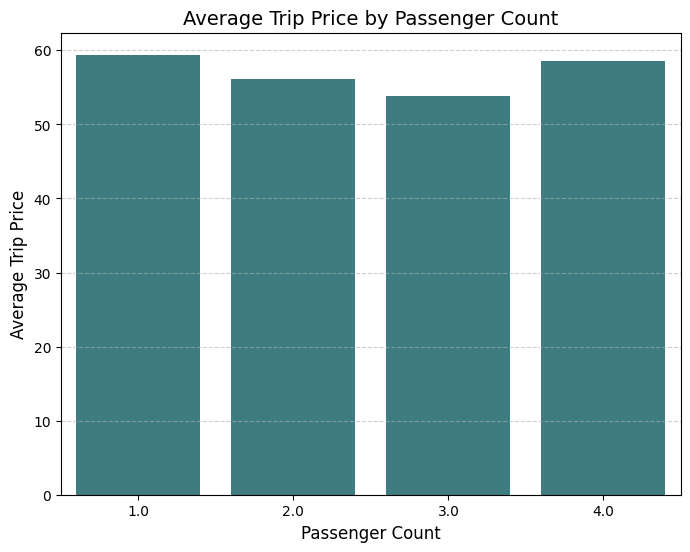

In [5]:
# Bar plot
plt.figure(figsize=(8, 6))

# Calculate average price by passenger count
avg_price_by_passenger = data.groupby("Passenger_Count")["Trip_Price"].mean().reset_index()

# Use a custom color palette explicitly for each Passenger_Count
sns.barplot(
    x="Passenger_Count", 
    y="Trip_Price", 
    data=avg_price_by_passenger,
    color=sns.color_palette("crest", n_colors=1)[0]  # Assign colors explicitly
)

# Customize title and axis labels
plt.title("Average Trip Price by Passenger Count", fontsize=14)
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Average Trip Price", fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


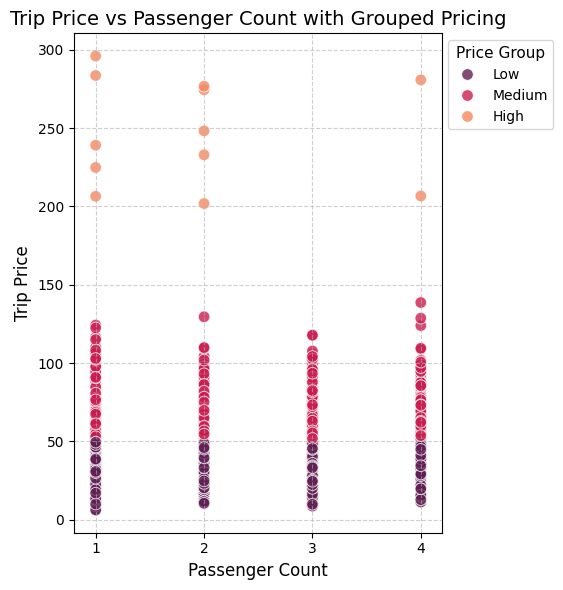

In [ ]:

# Scatter plot with subtle colors and more space for the legend
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x="Passenger_Count",
    y="Trip_Price",
    hue=pd.cut(data["Trip_Price"], bins=[0, 50, 150, 300], labels=["Low", "Medium", "High"]),
    data=data,
    palette="rocket",  # Use a softer color palette
    s=70,  # Point size
    alpha=0.8  # Transparency for better visibility
)
plt.title("Trip Price vs Passenger Count", fontsize=14)
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Trip Price", fontsize=12)

# Adjust legend position and spacing
plt.legend(
    title="Price Group", 
    loc="upper right", 
    bbox_to_anchor=(1.32, 1),  # Move legend further from the plot
    fontsize=10,  # Adjust legend font size
    title_fontsize=11  # Adjust title font size in the legend
)
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid for readability
plt.xlim(0.8, 4.2)  # Add limits slightly outside the data range
plt.xticks(ticks=data["Passenger_Count"].unique())


# Adjust layout and display the plots
plt.tight_layout()
plt.show()


- Niezależnie od liczby pasażerów, ceny przejazdów są najczęściej niskie.
- Wysokie ceny są rzadkie:
- Ceny od 50 do 150 jednostek są mniej powszechne, ale pojawiają się regularnie, szczególnie dla większej liczby pasażerów.
- Wykres sugeruje, że cena przejazdu nie zależy znacząco od liczby pasażerów (Passenger Count).
- Rozkład cen wygląda podobnie dla 1, 2, 3 i 4 pasażerów.

## Wnioski:
- Liczba pasażerów wydaje się mieć niewielki wpływ na cenę przejazdu.
- Cena prawdopodobnie zależy od innych zmiennych, takich jak odległość, czas przejazdu lub warunki drogowe.

### Podział na grupy cenowe pomaga zidentyfikować ogólne trendy:
- Większość przejazdów mieści się w niskim przedziale cenowym (Low).
- Tylko nieliczne przejazdy osiągają wysokie ceny (High).